<a href="https://colab.research.google.com/github/PShivani07/Data-Analytics-Project/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">**Churn prediction and Item recommendation on online retail dataset**</font>

## **Problem Statement**:

Given a transactional dataset, tasks to perform : <font color="blue">Exploratory Data Analysis (EDA), Data pre-processing, Customer Segmentation, User profiling, Item recommendation for each users and churn prediction</font>

# <font color="blue">**Exploratory Data Analysis (EDA)**</font>

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the csv file into dataframe
dataset = pd.read_csv('data.csv', encoding='unicode_escape')
dataset.head(10) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# Exploring number of observations and attributes
dataset.shape

(126831, 8)

In [5]:
# Exploring names of the attributes
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Exploring the types of the attributes
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Exploring the statistics of the numerical attributes
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,126831.000000,126830.000000,85758.000000
mean,8.908973,5.275754,15306.998624
std,300.020713,110.543596,1737.416966
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13911.000000
50%,3.000000,2.460000,15227.500000
75%,10.000000,4.210000,16893.000000
max,74215.000000,16888.020000,18283.000000


# <font color="blue">**Data Pre-Processing**</font>

## **Imputation**

In [8]:
# calculating number of missing values in each of the attributes
dataset.isnull().sum()

InvoiceNo          0
StockCode          0
Description      345
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     41073
Country            1
dtype: int64

In [9]:
# threshold to drop the observations if the proportion of null values is more than the threshold.
threshold = 0.4

In [10]:
# proportion of null values in description attribute
dataset['Description'].isnull().sum() / dataset.shape[0]

0.0027201551671121415

The proportion of null values in `Description` attribute is less than the `threshold`, hence safe to drop the observations with null values.

In [11]:
# Dropping the observations with null values for Description attribute
dataset.dropna(subset=['Description'], inplace=True)

In [12]:
# Validation of the dropped observations with null values for Description attribute
dataset['Description'].isnull().sum()

0

In [13]:
# proportion of null values in CustomerID attribute
dataset['CustomerID'].isnull().sum() / dataset.shape[0]

0.32199611024144964

The proportion of null values in `CustomerID` attribute is less than the `threshold`, hence safe to drop the observations with null values.


In [14]:
# Dropping the observations with null values for customerID attribute
dataset.dropna(subset=['CustomerID'], inplace=True)

In [15]:
# Validation of the dropped observations with null values for CustomerID attribute
dataset['CustomerID'].isnull().sum()

0

In [16]:
# New shape of the dataset after dropping the observation with null values
dataset.shape

(85758, 8)

In [17]:
# No attribute with null values
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Binning**

In [18]:
# Obtaining the classes of Country categorical attribute 
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada'],
      dtype=object)

In [19]:
# Obtaining the counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom          75999
Germany                  2110
France                   1769
EIRE                     1331
Spain                     647
Netherlands               527
Portugal                  355
Belgium                   355
Australia                 347
Switzerland               316
Cyprus                    304
Finland                   244
Channel Islands           241
Italy                     239
Norway                    197
Japan                     178
Sweden                    103
Poland                     70
Iceland                    60
Denmark                    59
Singapore                  56
Greece                     54
Lebanon                    45
Lithuania                  35
Austria                    34
United Arab Emirates       30
Israel                     18
Czech Republic             15
Saudi Arabia               10
Canada                     10
Name: Country, dtype: int64

Replacing the `Country` name class with `others` whose frequency is less than 100

In [20]:
dataset['Country'] = dataset['Country'].replace(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'], 'Others')

In [21]:
# Obtaining the new counts of each class of Country attribute
dataset['Country'].value_counts()

United Kingdom     75999
Germany             2110
France              1769
EIRE                1331
Spain                647
Netherlands          527
Portugal             355
Belgium              355
Australia            347
Switzerland          316
Cyprus               304
Finland              244
Channel Islands      241
Italy                239
Norway               197
Japan                178
Others               135
Sweden               103
Poland                70
Iceland               60
Denmark               59
Singapore             56
Greece                54
Austria               34
Israel                18
Canada                10
Name: Country, dtype: int64

## **Removing and handling Outliers**

Removing the outlier rows by using InterQuartile range

In [22]:
# Statistical description of Quantity attribute
dataset['Quantity'].describe()

count    85758.000000
mean        12.042643
std        362.974119
min     -74215.000000
25%          2.000000
50%          5.000000
75%         12.000000
max      74215.000000
Name: Quantity, dtype: float64

In [23]:
# Obtaining q1, q3, iqr, upper and lower limits for Quantity attribute
a = []
a = np.sort(dataset['Quantity'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 27.0
lower limit : -3.0


In [24]:
# Removing the outliers by filtering
dataset = dataset[(dataset['Quantity'] < upper_lim) & (dataset['Quantity'] > lower_lim)]

In [25]:
# Statistical description of UnitPrice attribute
dataset['UnitPrice'].describe()

count    79466.000000
mean         3.495401
std         15.860687
min          0.000000
25%          1.250000
50%          2.100000
75%          3.750000
max       1715.850000
Name: UnitPrice, dtype: float64

In [26]:
# Obtaining q1, q3, iqr, upper and lower limits for UnitPrice attribute
a = []
a = np.sort(dataset['UnitPrice'])
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
upper_lim = q3 + 1.5 * iqr
lower_lim = q3 - 1.5 * iqr
print(f'upper limit : {upper_lim}\nlower limit : {lower_lim}')

upper limit : 7.5
lower limit : 0.0


In [27]:
# Removing the outliers by filtering
dataset = dataset[(dataset['UnitPrice'] < upper_lim) & (dataset['UnitPrice'] > lower_lim)]

In [28]:
# Obtaining the negative and 0 values of Quantity attribute
a = []
for i in dataset['Quantity']:
  if i <= 0:
    a.append(i)

print(a)

[-1, -1, -2, -1, -1, -1, -2, -1, -1, -2, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -2, -2, -1, -2, -1, -2, -1, -1, -1, -1, -2, -1, -1, -1, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -2, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -2, -1, -2, -1, -1, -1, -2, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1,

In [29]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['Quantity'] > 0]

In [30]:
# Obtaining the negative and 0 values of UnitPrice attribute
b = []
for i in dataset['UnitPrice']:
  if i <= 0:
    b.append(i)
print(b)

[]


In [31]:
# Excluding negative quantity and 0 valued observations
dataset = dataset[dataset['UnitPrice'] > 0]

In [32]:
# New shape of the dataset
dataset.shape

(69987, 8)

## **Log Transformation**

In [33]:
# Applying log transformation on Quantity and UnitPrice attributes
dataset['Log_Transformed_Quantity'] = dataset['Quantity'].transform(np.log1p)
dataset['Log_Transformed_UnitPrice'] = dataset['UnitPrice'].transform(np.log1p)

In [34]:
# Exploring the dataset after transformations
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402


## **Scaling**

### 1. Normalization

In [35]:
dataset['Normalized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].min()) / (dataset['Quantity'].max() - dataset['Quantity'].min())

dataset['Normalized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].min()) / (dataset['UnitPrice'].max() - dataset['UnitPrice'].min()) 

### 2. Standardization

In [36]:
dataset['Standardized_Quantity'] = (dataset['Quantity'] - dataset['Quantity'].mean()) / dataset['Quantity'].std()

dataset['Standardized_UnitPrice'] = (dataset['UnitPrice'] - dataset['UnitPrice'].mean()) / dataset['UnitPrice'].std()

In [37]:
# Exploring the dataset after scaling
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.207516,0.177813
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.089693,0.308067
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.565807,-0.207516,1.284976
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.207516,-0.278078
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.207516,-0.278078
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.207516,-0.115260
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.207516,-0.115260


## **Date & Time extraction**

In [38]:
# Creating the attributes for date, month, year, weekday and time of InvoiceDate
dataset['Date'] = pd.to_datetime(dataset['InvoiceDate']).dt.day

dataset['Month'] = pd.to_datetime(dataset['InvoiceDate']).dt.month

dataset['Year'] = pd.to_datetime(dataset['InvoiceDate']).dt.year

dataset['Weekday'] = pd.to_datetime(dataset['InvoiceDate']).dt.day_name()

dataset['Time'] = pd.to_datetime(dataset['InvoiceDate']).dt.time

In [39]:
# Exploring the created date, day, time attributes
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.207516,0.177813,1,12,2010,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.089693,0.308067,1,12,2010,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1.945910,1.658228,0.20,0.565807,-0.207516,1.284976,1,12,2010,Wednesday,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.207516,-0.278078,1,12,2010,Wednesday,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1.945910,1.047319,0.20,0.240163,-0.207516,-0.278078,1,12,2010,Wednesday,08:28:00
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.207516,-0.115260,1,12,2010,Wednesday,08:34:00
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom,1.945910,1.131402,0.20,0.274084,-0.207516,-0.115260,1,12,2010,Wednesday,08:34:00


## **Visual Representation**

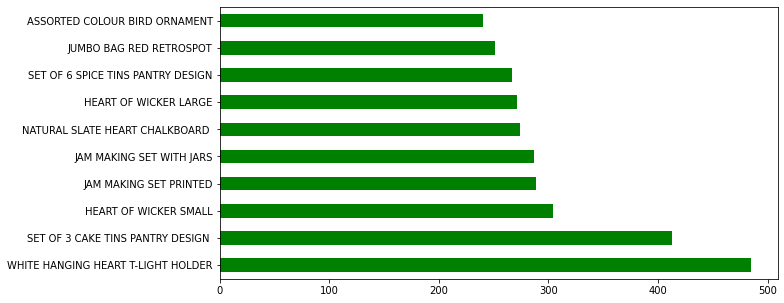

In [40]:
# Exploring the description of the 10 products with the highest count
dataset['Description'].value_counts()[:10].plot(kind='barh', color='green', figsize=(10, 5))

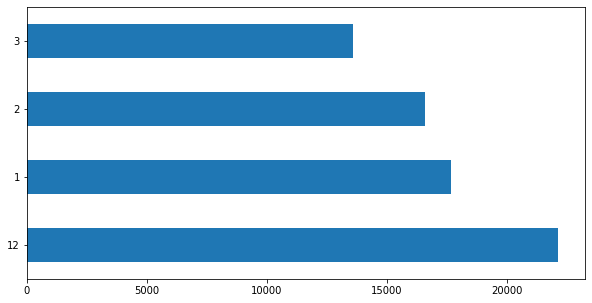

In [41]:
# Exploring the sales in different months
dataset['Month'].value_counts().plot(kind='barh', figsize=(10,5))

From the graph, we can interpret that November recorded most sales and February recorded least sales.

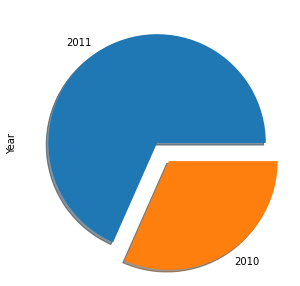

In [42]:
# Exploring the number of sales by year
dataset['Year'].value_counts().plot(kind='pie', explode=(0,0.2), shadow=True, figsize=(10,5))

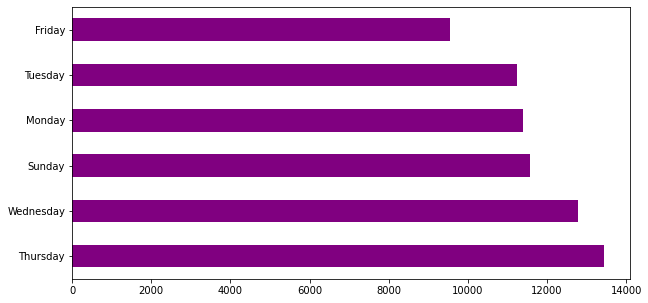

In [43]:
# Exploring the number of sales by days
dataset['Weekday'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

From the above graph, we can interpret that the store used to be closed on saturdays and the maximum sales used to happen on thursday as opposed to the least sales on Friday.

# <font color="blue">**Customer Segmentation**</font>

In [44]:
# Exploring the dataset grouped by InvoiceNo and Description
dataset.groupby(['InvoiceNo', 'Description']).size()[:50]

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         1
           GLASS STAR FROSTED T-LIGHT HOLDER      1
           KNITTED UNION FLAG HOT WATER BOTTLE    1
           RED WOOLLY HOTTIE WHITE HEART.         1
           WHITE HANGING HEART T-LIGHT HOLDER     1
           WHITE METAL LANTERN                    1
536366     HAND WARMER RED POLKA DOT              1
           HAND WARMER UNION JACK                 1
536367     BOX OF 6 ASSORTED COLOUR TEASPOONS     1
           BOX OF VINTAGE JIGSAW BLOCKS           1
           FELTCRAFT PRINCESS CHARLOTTE DOLL      1
           HOME BUILDING BLOCK WORD               1
           IVORY KNITTED MUG COSY                 1
           LOVE BUILDING BLOCK WORD               1
           POPPY'S PLAYHOUSE BEDROOM              1
           POPPY'S PLAYHOUSE KITCHEN              1
536368     BLUE COAT RACK PARIS FASHION           1
           JAM MAKING SET WITH JARS               1
           RED CO

In [45]:
# Exploring the dataset grouped by CustomerID and Description
dataset.groupby(['CustomerID', 'Description']).size()

CustomerID  Description                       
12347.0     3D DOG PICTURE PLAYING CARDS          2
            60 TEATIME FAIRY CAKE CASES           1
            72 SWEETHEART FAIRY CAKE CASES        1
            AIRLINE BAG VINTAGE JET SET BROWN     2
            AIRLINE BAG VINTAGE JET SET WHITE     1
                                                 ..
18283.0     TOILET METAL SIGN                     1
            TRAVEL SEWING KIT                     1
            VINTAGE BILLBOARD LOVE/HATE MUG       2
            WHITE HANGING HEART T-LIGHT HOLDER    1
            WOODLAND CHARLOTTE BAG                2
Length: 59301, dtype: int64

## **1. Products Ordered**

In [46]:
def encode_column(column):
  if column > 0:
    return 1
  if column <= 0:
    return 0

# Function to get the count of the products ordered
def aggregate_by_ordered_quantity(dataframe, column_list):

  aggregated_dataframe = dataframe.groupby(column_list).Quantity.count().reset_index()

  aggregated_dataframe['Products_ordered'] = aggregated_dataframe.Quantity.apply(encode_column)

  final_dataframe = aggregated_dataframe.groupby(column_list[0]).Products_ordered.sum().reset_index()

  return final_dataframe

In [47]:
# Creating customers dataframe
customers = aggregate_by_ordered_quantity(dataset, ['CustomerID', 'Description'])

customers.head()

,CustomerID,Products_ordered
0,12347.0,46
1,12348.0,5
2,12350.0,16
3,12352.0,21
4,12356.0,17


## **2. Total Spending**

Creating a `Sales` attribute which is product of `Quantity` and `UnitPrice`.

In [48]:
dataset['Sales'] = dataset['Quantity'] * dataset['UnitPrice']

# Exploring the dataset to validate the Sales attribute
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.207516,0.177813,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.089693,0.308067,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34


In [49]:
# Obtaining customers total spending
customer_total_spending = dataset.groupby('CustomerID').Sales.sum().reset_index()

customer_total_spending.rename(columns = {'Sales' : 'Total_spending'}, inplace = True)

In [50]:
# Merging the two dataframes on CustomerID
customers = pd.merge(customers, customer_total_spending, on='CustomerID')

print(f'The number of customers from the existing customer base : {customers.shape[0]}')

customers.head()

The number of customers from the existing customer base : 1885


,CustomerID,Products_ordered,Total_spending
0,12347.0,46,1088.03
1,12348.0,5,73.20
2,12350.0,16,294.40
3,12352.0,21,419.08
4,12356.0,17,818.70


## **Scaling using Log1p transform**

In [51]:
# Function to apply log1p transformation
def apply_log1p_transformation(dataframe, column):

  dataframe['log_' + column] = np.log1p(dataframe[column])
  return dataframe['log_' + column]

### 1. Products ordered

In [52]:
apply_log1p_transformation(customers, 'Products_ordered')

0       3.850148
1       1.791759
2       2.833213
3       3.091042
4       2.890372
          ...   
1880    3.931826
1881    2.079442
1882    1.609438
1883    2.197225
1884    4.644391
Name: log_Products_ordered, Length: 1885, dtype: float64

### 2. Total spending

In [53]:
apply_log1p_transformation(customers, 'Total_spending')

0       6.993043
1       4.306764
2       5.688330
3       6.040445
4       6.708938
          ...   
1880    6.962859
1881    5.133443
1882    4.313480
1883    4.927254
1884    5.705281
Name: log_Total_spending, Length: 1885, dtype: float64

In [54]:
# Exploring the dataset to validate the log transformed attributes
customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending
0,12347.0,46,1088.03,3.850148,6.993043
1,12348.0,5,73.20,1.791759,4.306764
2,12350.0,16,294.40,2.833213,5.688330
3,12352.0,21,419.08,3.091042,6.040445
4,12356.0,17,818.70,2.890372,6.708938


## **Feature Selection**

In [55]:
customers.iloc[:,3:]

,log_Products_ordered,log_Total_spending
0,3.850148,6.993043
1,1.791759,4.306764
2,2.833213,5.688330
3,3.091042,6.040445
4,2.890372,6.708938
...,...,...
1880,3.931826,6.962859
1881,2.079442,5.133443
1882,1.609438,4.313480
1883,2.197225,4.927254


# <font color="blue">**K-Means Clustering**</font>

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

kmeans_model.fit(customers.iloc[:,3:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Intracluster distance

In [58]:
print(f'Intracluster distance of the model is: ', kmeans_model.inertia_)

Intracluster distance of the model is:  439.45206605791526


This distance needs to be minimized by finding optimal hyper paramter.

## **Hyperparameter tuning**

In [59]:
def make_list_of_K(K, dataframe):

  cluster_values = list(range(1, K+1))
  inertia_values = []

  for c in cluster_values:
    model = KMeans(n_clusters=c, init='k-means++', max_iter=500, random_state=42)
    model.fit(dataframe)
    inertia_values.append(model.inertia_)
  
  return inertia_values

In [60]:
# Checking for k values between 1 to 15
results = make_list_of_K(15, customers.iloc[:, 3:])

In [61]:
k_values_distances = pd.DataFrame({'clusters': list(range(1, 16)), 'Intracluster distances': results})

print(k_values_distances)

    clusters  Intracluster distances
0          1             3870.279826
1          2             1738.015146
2          3             1095.557959
3          4              818.427139
4          5              682.766625
5          6              576.755959
6          7              503.256181
7          8              439.452066
8          9              385.296922
9         10              348.534518
10        11              320.267935
11        12              295.726590
12        13              273.314690
13        14              256.480340
14        15              241.480892


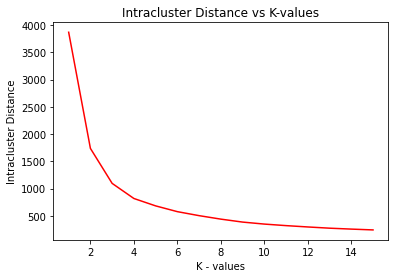

In [62]:
plt.plot(k_values_distances['clusters'], k_values_distances['Intracluster distances'], color='red')
plt.xlabel('K - values')
plt.ylabel('Intracluster Distance')
plt.title('Intracluster Distance vs K-values')
plt.show()

From the graph, its clear that after k = 4, the descent gets stabilized so the optimal k is 4.  

In [63]:
# Updating model with optimal k
updated_kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42)

updated_kmeans_model.fit_predict(customers.iloc[:, 3:])

array([1, 2, 0, ..., 2, 3, 0], dtype=int32)

## Adding cluster centers

In [64]:
# create cluster centers and actual data arrays
cluster_centers = updated_kmeans_model.cluster_centers_

actual_data = np.expm1(cluster_centers)

add_points = np.append(actual_data, cluster_centers, axis=1)

add_points

array([[  27.13842458,  373.94784902,    3.33713607,    5.92678695],
       [  69.33311388, 1106.06631257,    4.25324272,    7.00946883],
       [   2.82931118,   46.20592444,    1.34268494,    3.8545194 ],
       [  10.55194458,  166.84995569,    2.44685378,    5.12307046]])

In [65]:
# add labels to customers dataframe and add_points array
add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)
customers['clusters'] = updated_kmeans_model.labels_

In [66]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=['Products_ordered', 'Total_spending', 'log_Products_ordered', 'log_Total_spending', 'clusters'])

centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,27.138425,373.947849,3.337136,5.926787,0.0
1,69.333114,1106.066313,4.253243,7.009469,1.0
2,2.829311,46.205924,1.342685,3.854519,2.0
3,10.551945,166.849956,2.446854,5.123070,3.0


In [67]:
# Changing the type of clusters attribute to int
centers_df['clusters'] = centers_df['clusters'].astype('int')
centers_df.head()

,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,27.138425,373.947849,3.337136,5.926787,0
1,69.333114,1106.066313,4.253243,7.009469,1
2,2.829311,46.205924,1.342685,3.854519,2
3,10.551945,166.849956,2.446854,5.123070,3


In [68]:
customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters
0,12347.0,46,1088.03,3.850148,6.993043,1
1,12348.0,5,73.20,1.791759,4.306764,2
2,12350.0,16,294.40,2.833213,5.688330,0
3,12352.0,21,419.08,3.091042,6.040445,0
4,12356.0,17,818.70,2.890372,6.708938,0
5,12359.0,64,1022.31,4.174387,6.930798,1
6,12361.0,9,174.90,2.302585,5.169916,3
7,12362.0,26,434.10,3.295837,6.075576,0
8,12365.0,20,307.94,3.044522,5.733147,0
9,12370.0,114,2031.75,4.744932,7.617145,1


## **Cluster Visualization**

In [69]:
# Creating the attribute Cluster_name
customers['Cluster_name'] = customers['clusters'].astype(str)

customers.head(10)

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,46,1088.03,3.850148,6.993043,1,1
1,12348.0,5,73.20,1.791759,4.306764,2,2
2,12350.0,16,294.40,2.833213,5.688330,0,0
3,12352.0,21,419.08,3.091042,6.040445,0,0
4,12356.0,17,818.70,2.890372,6.708938,0,0
5,12359.0,64,1022.31,4.174387,6.930798,1,1
6,12361.0,9,174.90,2.302585,5.169916,3,3
7,12362.0,26,434.10,3.295837,6.075576,0,0
8,12365.0,20,307.94,3.044522,5.733147,0,0
9,12370.0,114,2031.75,4.744932,7.617145,1,1


In [70]:
# Obtaining the value counts of all the clusters.
magnitude_df = pd.DataFrame(customers.Cluster_name.value_counts().reset_index())

magnitude_df.rename(columns={'index':'Customer Groups', 'Cluster_name': 'Customer Group Magnitude'}, inplace=True)

magnitude_df

,Customer Groups,Customer Group Magnitude
0,0,681
1,3,608
2,1,388
3,2,208


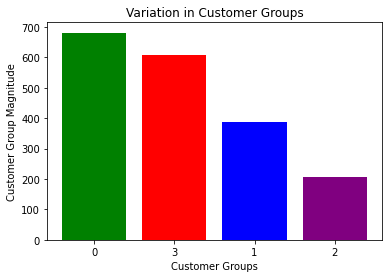

In [71]:
# Plotting the bar graph to interpret the number of customers in each clusters
plt.bar(magnitude_df['Customer Groups'], magnitude_df['Customer Group Magnitude'], color=['green', 'red', 'blue', 'purple'])
plt.xlabel('Customer Groups')
plt.ylabel('Customer Group Magnitude')
plt.title('Variation in Customer Groups')
plt.show()

# <font color="blue">**Customer Profiling**</font>

## Number of products brought by each customerID

In [72]:
customers.iloc[:,:2]

,CustomerID,Products_ordered
0,12347.0,46
1,12348.0,5
2,12350.0,16
3,12352.0,21
4,12356.0,17
...,...,...
1880,18260.0,50
1881,18269.0,7
1882,18270.0,4
1883,18280.0,8


## Total bill of each customerID

In [73]:
customers[['CustomerID', 'Total_spending']]

,CustomerID,Total_spending
0,12347.0,1088.03
1,12348.0,73.20
2,12350.0,294.40
3,12352.0,419.08
4,12356.0,818.70
...,...,...
1880,18260.0,1055.65
1881,18269.0,168.60
1882,18270.0,73.70
1883,18280.0,137.00


## **Customers Grouping based on customer segmentation**

### **Group 0**

In [74]:
customers[customers['clusters'] == 0]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
2,12350.0,16,294.40,2.833213,5.688330,0,0
3,12352.0,21,419.08,3.091042,6.040445,0,0
4,12356.0,17,818.70,2.890372,6.708938,0,0
7,12362.0,26,434.10,3.295837,6.075576,0,0
8,12365.0,20,307.94,3.044522,5.733147,0,0
...,...,...,...,...,...,...,...
1873,18230.0,18,464.82,2.944439,6.143799,0,0
1874,18231.0,19,399.75,2.995732,5.993338,0,0
1877,18250.0,17,270.62,2.890372,5.604404,0,0
1878,18257.0,14,324.00,2.708050,5.783825,0,0


### **Group1**

In [75]:
customers[customers['clusters'] == 1]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
0,12347.0,46,1088.03,3.850148,6.993043,1,1
5,12359.0,64,1022.31,4.174387,6.930798,1,1
9,12370.0,114,2031.75,4.744932,7.617145,1,1
12,12377.0,69,1472.52,4.248495,7.295409,1,1
13,12383.0,66,1114.28,4.204693,7.016861,1,1
...,...,...,...,...,...,...,...
1851,18172.0,48,1217.66,3.891820,7.105507,1,1
1868,18223.0,52,1325.67,3.970292,7.190427,1,1
1875,18239.0,45,834.62,3.828641,6.728174,1,1
1876,18245.0,50,693.68,3.931826,6.543451,1,1


### **Group2**

In [76]:
customers[customers['clusters'] == 2]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
1,12348.0,5,73.20,1.791759,4.306764,2,2
18,12401.0,2,32.85,1.098612,3.521939,2,2
23,12414.0,4,75.00,1.609438,4.330733,2,2
34,12435.0,2,78.00,1.098612,4.369448,2,2
41,12464.0,1,30.60,0.693147,3.453157,2,2
...,...,...,...,...,...,...,...
1810,18037.0,7,19.60,2.079442,3.025291,2,2
1814,18050.0,5,74.40,1.791759,4.322807,2,2
1818,18062.0,1,15.00,0.693147,2.772589,2,2
1840,18138.0,4,67.80,1.609438,4.231204,2,2


### **Group3**

In [77]:
customers[customers['clusters'] == 3]

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name
6,12361.0,9,174.90,2.302585,5.169916,3,3
11,12373.0,12,299.10,2.564949,5.704116,3,3
14,12386.0,7,215.70,2.079442,5.378514,3,3
19,12402.0,10,195.60,2.397895,5.281171,3,3
20,12407.0,14,211.30,2.708050,5.358000,3,3
...,...,...,...,...,...,...,...
1869,18224.0,10,158.95,2.397895,5.074861,3,3
1871,18226.0,12,253.10,2.564949,5.537728,3,3
1879,18259.0,7,376.30,2.079442,5.933041,3,3
1881,18269.0,7,168.60,2.079442,5.133443,3,3


## Frequency of customers visiting the store

In [78]:
frequency_of_customer = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

frequency_of_customer

CustomerID
12347.0    2
12348.0    2
12350.0    1
12352.0    3
12356.0    1
          ..
18260.0    3
18269.0    1
18270.0    1
18280.0    1
18283.0    3
Name: InvoiceNo, Length: 1885, dtype: int64

In [79]:
customers = pd.merge(customers, frequency_of_customer, on='CustomerID')

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,InvoiceNo
0,12347.0,46,1088.03,3.850148,6.993043,1,1,2
1,12348.0,5,73.20,1.791759,4.306764,2,2,2
2,12350.0,16,294.40,2.833213,5.688330,0,0,1
3,12352.0,21,419.08,3.091042,6.040445,0,0,3
4,12356.0,17,818.70,2.890372,6.708938,0,0,1


In [80]:
customers.rename(columns = {'InvoiceNo': 'Frequency_of_customer'}, inplace=True)

customers.head()

,CustomerID,Products_ordered,Total_spending,log_Products_ordered,log_Total_spending,clusters,Cluster_name,Frequency_of_customer
0,12347.0,46,1088.03,3.850148,6.993043,1,1,2
1,12348.0,5,73.20,1.791759,4.306764,2,2,2
2,12350.0,16,294.40,2.833213,5.688330,0,0,1
3,12352.0,21,419.08,3.091042,6.040445,0,0,3
4,12356.0,17,818.70,2.890372,6.708938,0,0,1


## Customer visit number per year and per month

In [81]:
new_dataset = dataset[['InvoiceNo', 'CustomerID', 'Year', 'Month']]

new_dataset.head()

,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
1,536365,17850.0,2010,12
2,536365,17850.0,2010,12
3,536365,17850.0,2010,12
4,536365,17850.0,2010,12


In [82]:
# Dropping the duplicates
new_dataset.drop_duplicates(inplace=True)

new_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,CustomerID,Year,Month
0,536365,17850.0,2010,12
7,536366,17850.0,2010,12
10,536367,13047.0,2010,12
21,536368,13047.0,2010,12
25,536369,13047.0,2010,12


In [83]:
# Dropping the index
new_dataset = new_dataset.reset_index(drop=True)

In [84]:
# Obtaining number of visits per year
new_dataset['Visit_no_yr'] = new_dataset.groupby(['CustomerID', 'Year']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr
0,536365,17850.0,2010,12,1
1,536366,17850.0,2010,12,2
2,536367,13047.0,2010,12,1
3,536368,13047.0,2010,12,2
4,536369,13047.0,2010,12,3
...,...,...,...,...,...
3785,547098,16384.0,2011,3,1
3786,547099,18224.0,2011,3,1
3787,547100,15615.0,2011,3,3
3788,547101,16029.0,2011,3,4


In [85]:
# Number of visits per month
new_dataset['Visit_no_month'] = new_dataset.groupby(['CustomerID', 'Month']).cumcount() + 1

new_dataset

,InvoiceNo,CustomerID,Year,Month,Visit_no_yr,Visit_no_month
0,536365,17850.0,2010,12,1,1
1,536366,17850.0,2010,12,2,2
2,536367,13047.0,2010,12,1,1
3,536368,13047.0,2010,12,2,2
4,536369,13047.0,2010,12,3,3
...,...,...,...,...,...,...
3785,547098,16384.0,2011,3,1,1
3786,547099,18224.0,2011,3,1,1
3787,547100,15615.0,2011,3,3,1
3788,547101,16029.0,2011,3,4,1


# <font color='blue'>**Item Recommendation system using Word2Vec**</font>

In [86]:
no_of_customers =  list(dataset['CustomerID'].unique())

print(f'Number of unique customers are {len(no_of_customers)}')

Number of unique customers are 1885


In [87]:
# Typecasting
dataset['StockCode'] = dataset['StockCode'].astype(str)

### Shuffling the customers and using 90% of it for creating the model & then splitting into train and validation dataset

In [88]:
import random

random.shuffle(no_of_customers)

customers_train = [no_of_customers[i] for i in range(round(0.9 * len(no_of_customers)))]

train_dataset = dataset[dataset['CustomerID'].isin(customers_train)]
validation_dataset = dataset[~dataset['CustomerID'].isin(customers_train)]

## List of purchases made by the customer 

In [89]:
from tqdm import tqdm

### 1. Training dataset

In [90]:
purchases_train = []

for i in tqdm(customers_train):
  temp = list(train_dataset[train_dataset['CustomerID'] == i]['StockCode'])
  purchases_train.append(temp)

100%|██████████| 1696/1696 [00:01<00:00, 1073.38it/s]


### 2. Validation dataset

In [91]:
purchases_val = []

for i in tqdm(validation_dataset['CustomerID'].unique()):
  temp = list(validation_dataset[validation_dataset['CustomerID'] == i]['StockCode'])
  purchases_val.append(temp)

100%|██████████| 189/189 [00:00<00:00, 1503.50it/s]


In [92]:
from gensim.models import Word2Vec

### Creating the Word2Vec model

In [93]:
model = Word2Vec(window = 10, sg = 1, hs = 0, negative = 10, alpha = 0.03, min_alpha = 0.0007, seed = 14)

model.build_vocab(purchases_train, progress_per = 200)

model.train(purchases_train, total_examples = model.corpus_count, epochs = 10, report_delay = 1)

(613361, 640120)

In [94]:
model.init_sims(replace=True)

print(model)

Word2Vec(vocab=1854, size=100, alpha=0.03)


### Each vector of 2879 unique vocabulary words has the size of 100

In [95]:
X = model[model.wv.vocab]

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(1854, 100)

### Visual representation of similar products

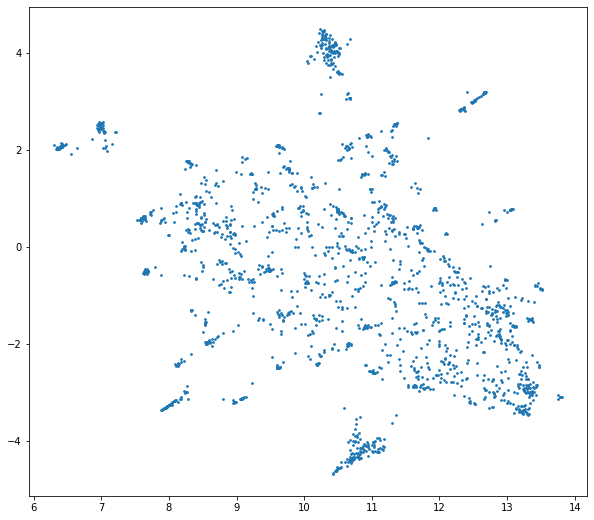

In [96]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

### Creating a product dictionary

In [97]:
products = train_dataset[['StockCode', 'Description']]

products.drop_duplicates(inplace=True, subset='StockCode', keep='last')

products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
products_dict['22748']

["POPPY'S PLAYHOUSE KITCHEN"]

In [99]:
products_dict['84029G']

['KNITTED UNION FLAG HOT WATER BOTTLE']

## Recommendation Function based on single product vector and will return 6 similar products

In [100]:
def similar_products(v, n = 6):
  ms = model.similar_by_vector(v, topn = n + 1)[1:]
  new_ms = []
  for j in ms:
    pair = (products_dict[j[0]][0], j[1])
    new_ms.append(pair)
  
  return new_ms

In [101]:
similar_products(model['84029G'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RED WOOLLY HOTTIE WHITE HEART.', 0.8578903675079346),
 ('ENGLISH ROSE HOT WATER BOTTLE', 0.7484748363494873),
 ('WOOD S/3 CABINET ANT WHITE FINISH', 0.7331353425979614),
 ('HAND WARMER RED RETROSPOT', 0.7328670024871826),
 ('LAVENDER INCENSE IN TIN', 0.7315800786018372),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.7240634560585022)]

## Recommendation function based on average of products vector bought by user and will return 6 similar products

In [102]:
def aggregate_vectors(products):
  product_vec = []
  for i in products:
    try:
      product_vec.append(model[i])
    except KeyError:
      continue
  
  return np.mean(product_vec, axis=0)

In [103]:
len(purchases_val[0])

32

In [104]:
aggregate_vectors(purchases_val[0]).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(100,)

In [105]:
similar_products(aggregate_vectors(purchases_val[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('HOT WATER BOTTLE TEA AND SYMPATHY', 0.7797672748565674),
 ('TABLE LAMP WHITE SHADE WOOD BASE', 0.7703139185905457),
 ('WHITE SOAP RACK WITH 2 BOTTLES', 0.7619615793228149),
 ('BATHROOM SCALES FOOTPRINTS IN SAND', 0.7561478614807129),
 ('COSY SLIPPER SHOES LARGE GREEN', 0.7535152435302734),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.7521835565567017)]

In [106]:
similar_products(aggregate_vectors(purchases_val[0][-5:]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('HAND WARMER BABUSHKA DESIGN', 0.7895529270172119),
 ('CARDHOLDER GINGHAM CHRISTMAS TREE', 0.7865744233131409),
 ('HOT WATER BOTTLE BABUSHKA ', 0.7701534628868103),
 ('HAND WARMER BIRD DESIGN', 0.7683818936347961),
 ('PORCELAIN T-LIGHT HOLDERS ASSORTED', 0.7668390274047852),
 ('HI TEC ALPINE HAND WARMER', 0.7580749988555908)]

# <font color="blue">**Churn Prediction**</font>

In [107]:
dataset[['Date', 'Month', 'Year']]

,Date,Month,Year
0,1,12,2010
1,1,12,2010
2,1,12,2010
3,1,12,2010
4,1,12,2010
...,...,...,...
126824,21,3,2011
126825,21,3,2011
126826,21,3,2011
126827,21,3,2011


In [108]:
dataset['Month'].unique()

array([12,  1,  2,  3])

## Splitting the dataset

### Initial dataset consists of data till end of july 2011 

In [109]:
initial_dataset = dataset[((dataset['Month']==12) & (dataset['Year']==2010)) | 
                          ((dataset['Month']==1) & (dataset['Year']==2011)) |
                          ((dataset['Month']==2) & (dataset['Year']==2011)) |
                          ((dataset['Month']==3) & (dataset['Year']==2011)) |
                          ((dataset['Month']==4) & (dataset['Year']==2011)) |
                          ((dataset['Month']==5) & (dataset['Year']==2011)) |
                          ((dataset['Month']==6) & (dataset['Year']==2011)) |
                          ((dataset['Month']==7) & (dataset['Year']==2011))]

initial_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,0.20,0.335142,-0.207516,0.177813,1,12,2010,Wednesday,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,0.28,0.362280,0.089693,0.308067,1,12,2010,Wednesday,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,0.20,0.449118,-0.207516,0.724882,1,12,2010,Wednesday,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126824,547102,22329,ROUND CONTAINER SET OF 5 RETROSPOT,12,3/21/2011 10:41,1.65,14245.0,United Kingdom,2.564949,0.974560,0.44,0.213026,0.684110,-0.408332,21,3,2011,Monday,10:41:00,19.80
126825,547102,21318,GLASS CHALICE BLUE SMALL,6,3/21/2011 10:41,1.65,14245.0,United Kingdom,1.945910,0.974560,0.20,0.213026,-0.207516,-0.408332,21,3,2011,Monday,10:41:00,9.90
126826,547102,21534,DAIRY MAID LARGE MILK JUG,3,3/21/2011 10:41,4.95,14245.0,United Kingdom,1.386294,1.783391,0.08,0.660787,-0.653329,1.740867,21,3,2011,Monday,10:41:00,14.85
126827,547102,21530,DAIRY MAID TOASTRACK,6,3/21/2011 10:41,2.95,14245.0,United Kingdom,1.945910,1.373716,0.20,0.389417,-0.207516,0.438322,21,3,2011,Monday,10:41:00,17.70


### Final dataset consists data from start of August 2011 till end

In [110]:
final_dataset = dataset[((dataset['Month']==8) & (dataset['Year']==2011)) |
                        ((dataset['Month']==9) & (dataset['Year']==2011)) | 
                        ((dataset['Month']==10) & (dataset['Year']==2011)) |
                        ((dataset['Month']==11) & (dataset['Year']==2011)) |
                        ((dataset['Month']==12) & (dataset['Year']==2011))]

final_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Transformed_Quantity,Log_Transformed_UnitPrice,Normalized_Quantity,Normalized_UnitPrice,Standardized_Quantity,Standardized_UnitPrice,Date,Month,Year,Weekday,Time,Sales


## Finding the frequency of each customers during start of December 2010 to end of July 2011 

In [111]:
initial_frequency = initial_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

initial_frequency

CustomerID
12347.0    2
12348.0    2
12350.0    1
12352.0    3
12356.0    1
          ..
18260.0    3
18269.0    1
18270.0    1
18280.0    1
18283.0    3
Name: InvoiceNo, Length: 1885, dtype: int64

In [112]:
initial_frequency_table = pd.DataFrame({'CustomerID': initial_dataset['CustomerID'].unique()})

initial_frequency_table = initial_frequency_table.sort_values('CustomerID').reset_index()

del initial_frequency_table['index']

initial_frequency_table

,CustomerID
0,12347.0
1,12348.0
2,12350.0
3,12352.0
4,12356.0
...,...
1880,18260.0
1881,18269.0
1882,18270.0
1883,18280.0


In [113]:
initial_frequency_table = pd.merge(initial_frequency_table, initial_frequency, on='CustomerID')

initial_frequency_table.head(10)

,CustomerID,InvoiceNo
0,12347.0,2
1,12348.0,2
2,12350.0,1
3,12352.0,3
4,12356.0,1
5,12359.0,2
6,12361.0,1
7,12362.0,1
8,12365.0,1
9,12370.0,3


In [114]:
initial_frequency_table.rename(columns={'InvoiceNo': 'Initial_frequency'}, inplace=True)

initial_frequency_table

,CustomerID,Initial_frequency
0,12347.0,2
1,12348.0,2
2,12350.0,1
3,12352.0,3
4,12356.0,1
...,...,...
1880,18260.0,3
1881,18269.0,1
1882,18270.0,1
1883,18280.0,1


In [115]:
initial_frequency_table['Initial_frequency'].describe()

count    1885.000000
mean        2.010610
std         2.580116
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        48.000000
Name: Initial_frequency, dtype: float64

## Finding the frequency of each customers during start of August 2011 to end of dataset

In [116]:
final_frequency = final_dataset.groupby('CustomerID')['InvoiceNo'].nunique()

final_frequency

Series([], Name: InvoiceNo, dtype: int64)

In [117]:
final_frequency_table = pd.DataFrame({'CustomerID': final_dataset['CustomerID'].unique()})

final_frequency_table = final_frequency_table.sort_values('CustomerID').reset_index()

del final_frequency_table['index']

final_frequency_table

,CustomerID


In [118]:
final_frequency_table = pd.merge(final_frequency_table, final_frequency, on='CustomerID')

final_frequency_table.rename(columns={'InvoiceNo': 'Final_frequency'}, inplace=True)

final_frequency_table

,CustomerID,Final_frequency


In [119]:
final_frequency_table['Final_frequency'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Final_frequency, dtype: float64

## Checking for customers who used to shop before but have stopped shopping from last 4 months

In [120]:
a = np.array(initial_frequency_table['CustomerID'])
b = np.array(final_frequency_table['CustomerID'])

### Churned customers

In [121]:
c = np.setdiff1d(a, b)
print(len(c), c)

1885 [12347. 12348. 12350. ... 18270. 18280. 18283.]


### Unchurned customers

In [122]:
d = np.intersect1d(a, b)
print(len(d), d)

0 []


In [123]:
e = np.setdiff1d(b, a)
print(len(e), e)

0 []


In [124]:
list1 = []
for i in range(len(c)):
  list1.append('CHURN')

In [125]:
list2 = []
for i in range(len(d)):
  list2.append('NOT CHURN')

In [126]:
list3 = []
for i in range(len(e)):
  list3.append('NOT CHURN')

In [127]:
dict1 = dict(zip(c, list1))
dict2 = dict(zip(d, list2))
churn_dict = dict(zip(e, list3))

dict2.update(dict1)
churn_dict.update(dict2)

In [128]:
from collections import OrderedDict

churn_dictionary = OrderedDict(sorted(churn_dict.items()))

churn_dictionary

OrderedDict([(12347.0, 'CHURN'),
             (12348.0, 'CHURN'),
             (12350.0, 'CHURN'),
             (12352.0, 'CHURN'),
             (12356.0, 'CHURN'),
             (12359.0, 'CHURN'),
             (12361.0, 'CHURN'),
             (12362.0, 'CHURN'),
             (12365.0, 'CHURN'),
             (12370.0, 'CHURN'),
             (12372.0, 'CHURN'),
             (12373.0, 'CHURN'),
             (12377.0, 'CHURN'),
             (12383.0, 'CHURN'),
             (12386.0, 'CHURN'),
             (12388.0, 'CHURN'),
             (12393.0, 'CHURN'),
             (12395.0, 'CHURN'),
             (12401.0, 'CHURN'),
             (12402.0, 'CHURN'),
             (12407.0, 'CHURN'),
             (12410.0, 'CHURN'),
             (12413.0, 'CHURN'),
             (12414.0, 'CHURN'),
             (12415.0, 'CHURN'),
             (12417.0, 'CHURN'),
             (12421.0, 'CHURN'),
             (12422.0, 'CHURN'),
             (12423.0, 'CHURN'),
             (12427.0, 'CHURN'),
          

## **Churn Prediction for each customer**

In [129]:
churn = pd.DataFrame(list(churn_dictionary.items()), columns=['CustomerID', 'Prediction'])

In [130]:
churn.head(10)

,CustomerID,Prediction
0,12347.0,CHURN
1,12348.0,CHURN
2,12350.0,CHURN
3,12352.0,CHURN
4,12356.0,CHURN
5,12359.0,CHURN
6,12361.0,CHURN
7,12362.0,CHURN
8,12365.0,CHURN
9,12370.0,CHURN


In [131]:
churn.tail(10)

,CustomerID,Prediction
1875,18239.0,CHURN
1876,18245.0,CHURN
1877,18250.0,CHURN
1878,18257.0,CHURN
1879,18259.0,CHURN
1880,18260.0,CHURN
1881,18269.0,CHURN
1882,18270.0,CHURN
1883,18280.0,CHURN
1884,18283.0,CHURN


# RFM Analysis

---

RFM stands for Recency, Frequency and Monetary Value each corresponding to some key customer trait. 

Recency is the number of days since last purchase.

Frequency is the total number of purchases made by a customer.

Monetary value is the total money spent by a customer.

Frequency and Monetary Value Effects a customer's lifetime value and Recency affects retention, a measure of engagement.

**Recency**

To calculate Recency score, we use a recent date point as a reference to compute number of days since the customer's last purchase.

In [132]:
# last date available in our dataset
dataset['InvoiceDate'].max()

'3/9/2011 9:52'

In [133]:
import datetime as dt
now = dt.date(2011, 12, 9)

In [134]:
rec_df = dataset.copy()

In [135]:
rec_df['date'] = pd.DatetimeIndex(rec_df['InvoiceDate']).date

In [136]:
# group by customers and check last date of purchase
rec_df = rec_df.groupby(by='CustomerID', as_index=False)['date'].max()
rec_df.columns = ['CustomerID','LastPurchaseDate']
rec_df.head()

,CustomerID,LastPurchaseDate
0,12347.0,2011-01-26
1,12348.0,2011-01-25
2,12350.0,2011-02-02
3,12352.0,2011-03-17
4,12356.0,2011-01-18


In [137]:
# calculate recency
rec_df['Recency'] = rec_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [138]:
rec_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12347.0,2011-01-26,317
1,12348.0,2011-01-25,318
2,12350.0,2011-02-02,310
3,12352.0,2011-03-17,267
4,12356.0,2011-01-18,325


Less the recency value, more recent the purchase is.

In [139]:
rec_df.sort_values(by=['Recency'])
rec_df = rec_df[['CustomerID','Recency']]
rec_df.head()

,CustomerID,Recency
0,12347.0,317
1,12348.0,318
2,12350.0,310
3,12352.0,267
4,12356.0,325


**Frequency**

In [140]:
freq_df = customers[["CustomerID","Frequency_of_customer"]]
freq_df.head()

,CustomerID,Frequency_of_customer
0,12347.0,2
1,12348.0,2
2,12350.0,1
3,12352.0,3
4,12356.0,1


**Monetary**

In [141]:
monetary = customers[["CustomerID","Total_spending"]]
monetary.head()

,CustomerID,Total_spending
0,12347.0,1088.03
1,12348.0,73.20
2,12350.0,294.40
3,12352.0,419.08
4,12356.0,818.70


**Create RFM Table**

In [142]:
rfm = rec_df.merge(freq_df, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency_of_customer
0,12347.0,317,2
1,12348.0,318,2
2,12350.0,310,1
3,12352.0,267,3
4,12356.0,325,1


In [143]:
rfm = rfm.merge(monetary, on='CustomerID')
rfm.set_index('CustomerID', inplace=True)
rfm.head()

,Recency,Frequency_of_customer,Total_spending
CustomerID,,,
12347.0,317,2,1088.03
12348.0,318,2,73.20
12350.0,310,1,294.40
12352.0,267,3,419.08
12356.0,325,1,818.70


**RFM Anaylsis**

To conduct RFM analysis, here we rank these customers from 1-4 using RFM values. We sort customers based on RFM value. A final RFM score is calculated simply by combining individual RFM score number.

In [144]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency_of_customer,Total_spending
0.25,280.0,1.0,149.70
0.50,298.0,1.0,291.60
0.75,332.0,2.0,580.72


In [145]:
quantiles.to_dict()

{'Frequency_of_customer': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Recency': {0.25: 280.0, 0.5: 298.0, 0.75: 332.0},
 'Total_spending': {0.25: 149.70000000000005,
  0.5: 291.6,
  0.75: 580.7199999999997}}

**Creation of RFM Segments**

Here, high value of recency has low score while high value of frequency and monetary value has high score.

In [146]:
def RScore(x, p, d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

def FMScore(x, p, d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

In [147]:
rfm_seg = rfm.copy()
rfm_seg['R_Quartile'] = rfm_seg['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm_seg['F_Quartile'] = rfm_seg['Frequency_of_customer'].apply(FMScore, args=('Frequency_of_customer', quantiles,))
rfm_seg['M_Quartile'] = rfm_seg['Total_spending'].apply(FMScore, args=('Total_spending', quantiles,))
rfm_seg.head()

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12347.0,317,2,1088.03,2,3,4
12348.0,318,2,73.20,2,3,1
12350.0,310,1,294.40,2,1,3
12352.0,267,3,419.08,4,4,3
12356.0,325,1,818.70,2,1,4


Now, we combine these scores to give RFM value.

In [148]:
rfm_seg['RFMScore'] = rfm_seg.R_Quartile.map(str) + rfm_seg.F_Quartile.map(str) + rfm_seg.M_Quartile.map(str)
rfm_seg.head()

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12347.0,317,2,1088.03,2,3,4,234
12348.0,318,2,73.20,2,3,1,231
12350.0,310,1,294.40,2,1,3,213
12352.0,267,3,419.08,4,4,3,443
12356.0,325,1,818.70,2,1,4,214


As we know best score for recency, frequency and monetary value is 4. Hence the best RFM score is 444.

In [149]:
rfm_seg[rfm_seg['RFMScore']=='444'].sort_values('Total_spending', ascending=False).head(10)

,Recency,Frequency_of_customer,Total_spending,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
14911.0,264,32,11966.61,4,4,4,444
13089.0,268,22,10156.83,4,4,4,444
15311.0,270,31,7636.47,4,4,4,444
14298.0,267,15,5724.80,4,4,4,444
15039.0,270,14,4989.04,4,4,4,444
14156.0,269,10,4963.99,4,4,4,444
17841.0,266,28,4550.01,4,4,4,444
12681.0,269,8,4538.75,4,4,4,444
12748.0,266,48,3736.87,4,4,4,444


In [150]:
print("Best Customers: ",len(rfm_seg[rfm_seg['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_seg[rfm_seg['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_seg[rfm_seg['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_seg[rfm_seg['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_seg[rfm_seg['RFMScore']=='111']))

Best Customers:  156
Loyal Customers:  394
Big Spenders:  471
Almost Lost:  33
Lost Customers:  11
Lost Cheap Customers:  159


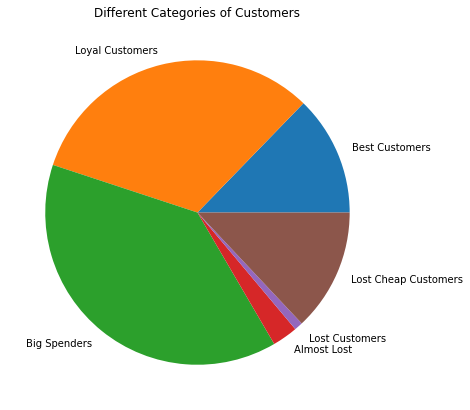

In [159]:
type_of_customers = ['Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', 'Lost Cheap Customers']
data = [len(rfm_seg[rfm_seg['RFMScore']=='444']), len(rfm_seg[rfm_seg['F_Quartile']==4]), len(rfm_seg[rfm_seg['M_Quartile']==4]), len(rfm_seg[rfm_seg['RFMScore']=='244']), len(rfm_seg[rfm_seg['RFMScore']=='144']), len(rfm_seg[rfm_seg['RFMScore']=='111'])]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = type_of_customers)
plt.title('Different Categories of Customers')
plt.show()

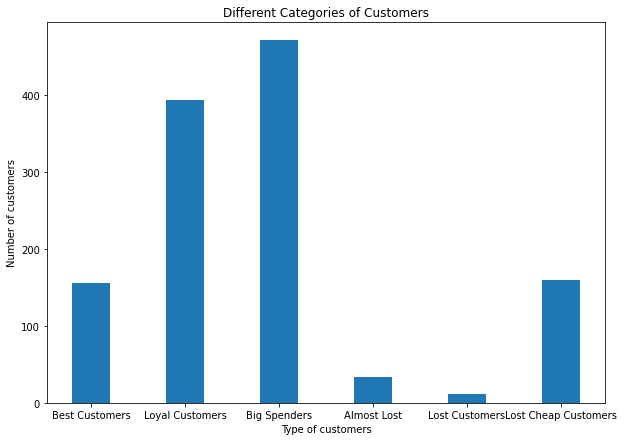

In [158]:
type_of_customers = ['Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', 'Lost Cheap Customers']
data = [len(rfm_seg[rfm_seg['RFMScore']=='444']), len(rfm_seg[rfm_seg['F_Quartile']==4]), len(rfm_seg[rfm_seg['M_Quartile']==4]), len(rfm_seg[rfm_seg['RFMScore']=='244']), len(rfm_seg[rfm_seg['RFMScore']=='144']), len(rfm_seg[rfm_seg['RFMScore']=='111'])]
fig = plt.figure(figsize=(10, 7))
plt.bar(type_of_customers, data, width = 0.4)
plt.xlabel('Type of customers')
plt.ylabel('Number of customers')
plt.title('Different Categories of Customers')
plt.show()

Now we have segmented our customers into categories. We need to choose strategies to deal with each category. For instance,

Best Customers: We reward them by allowing earlier access to new products. Suggest them to "Refer a friend".

At Risk: Send personalized emails and discounts to encourage them to shop.